## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

## Importing the Dataset

In [2]:
df= pd.read_csv("TrainTry.csv")

## Analyzing the Dataframe

In [3]:
df.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Bed,Bath,GarageArea
0,208500,8450,7,5,2003,856,854,1710,2,1,3,3,548
1,181500,9600,6,8,1976,1262,0,1262,2,0,3,2,460
2,223500,11250,7,5,2001,920,866,1786,2,1,3,3,608
3,140000,9550,7,5,1915,961,756,1717,1,0,3,1,642
4,250000,14260,8,5,2000,1145,1053,2198,2,1,4,3,836


In [4]:
df.describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Bed,Bath,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,1515.463699,1.565068,0.382877,2.866438,1.947945,472.980137
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,525.480383,0.550916,0.502885,0.815778,0.794965,213.804841
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,334.500000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,2.000000,480.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,1776.750000,2.000000,1.000000,3.000000,3.000000,576.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,8.000000,4.000000,1418.000000


In [5]:
df.columns

Index(['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'Bed',
       'Bath', 'GarageArea'],
      dtype='object')

In [6]:
x=df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'Bed',
       'Bath', 'GarageArea']]
y= df['SalePrice']

## Plotting graphs to understand the Dataset

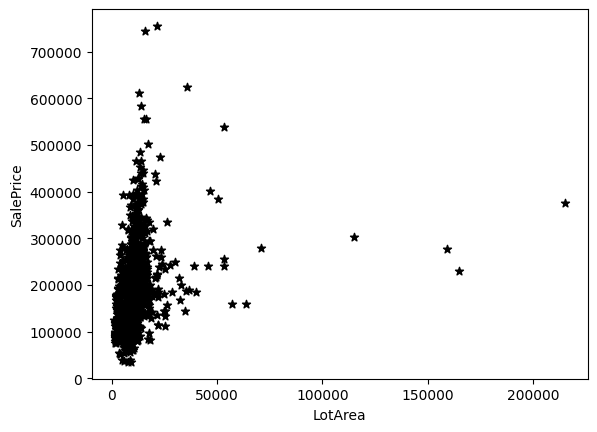

In [7]:
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.scatter(df.LotArea,df.SalePrice,color='black', marker='*')

<Axes: >

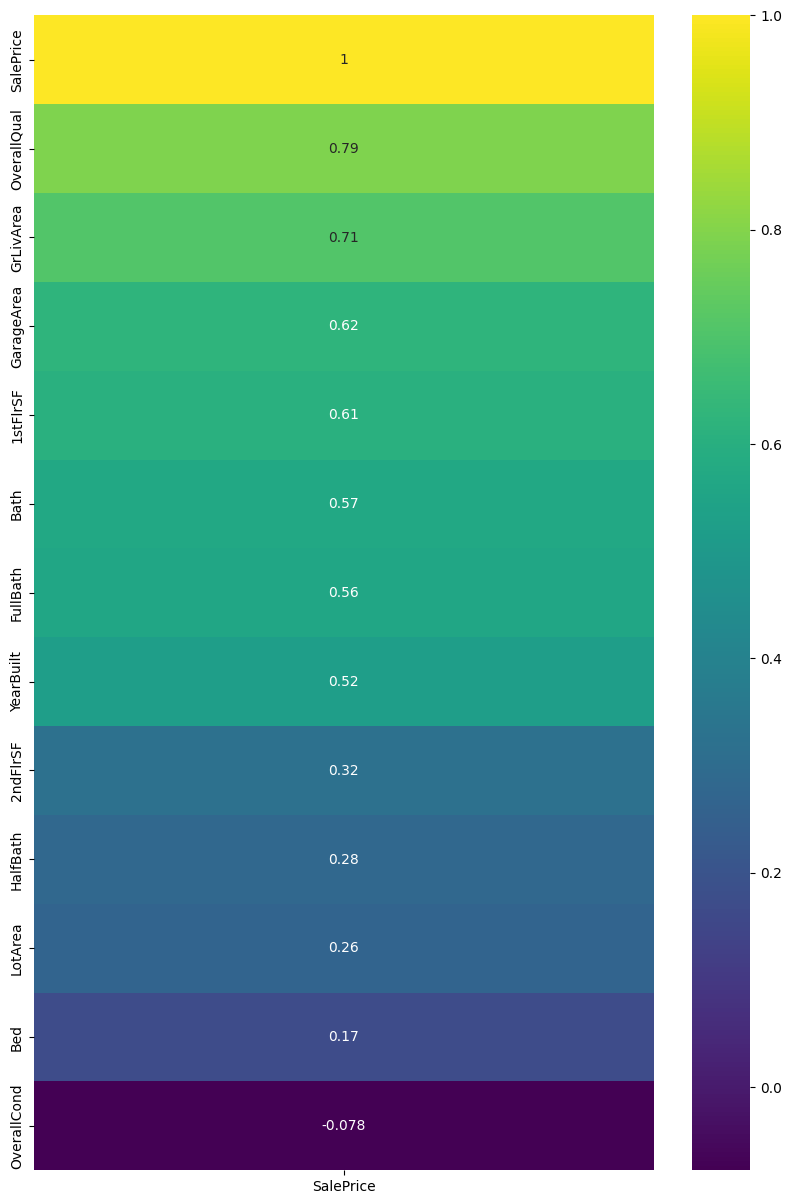

In [8]:
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10, 15))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='viridis')

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='Bath', ylabel='SalePrice'>,
        <Axes: xlabel='Bed', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='Bath', ylabel='GrLivArea'>,
        <Axes: xlabel='Bed', ylabel='GrLivArea'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='Bath', ylabel='OverallQual'>,
        <Axes: xlabel='Bed', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='Bath'>,
        <Axes: xlabel='GrLivArea', ylabel='Bath'>,
        <Axes: xlabel='OverallQual', ylabel='Bath'>,
        <Axes: xlab

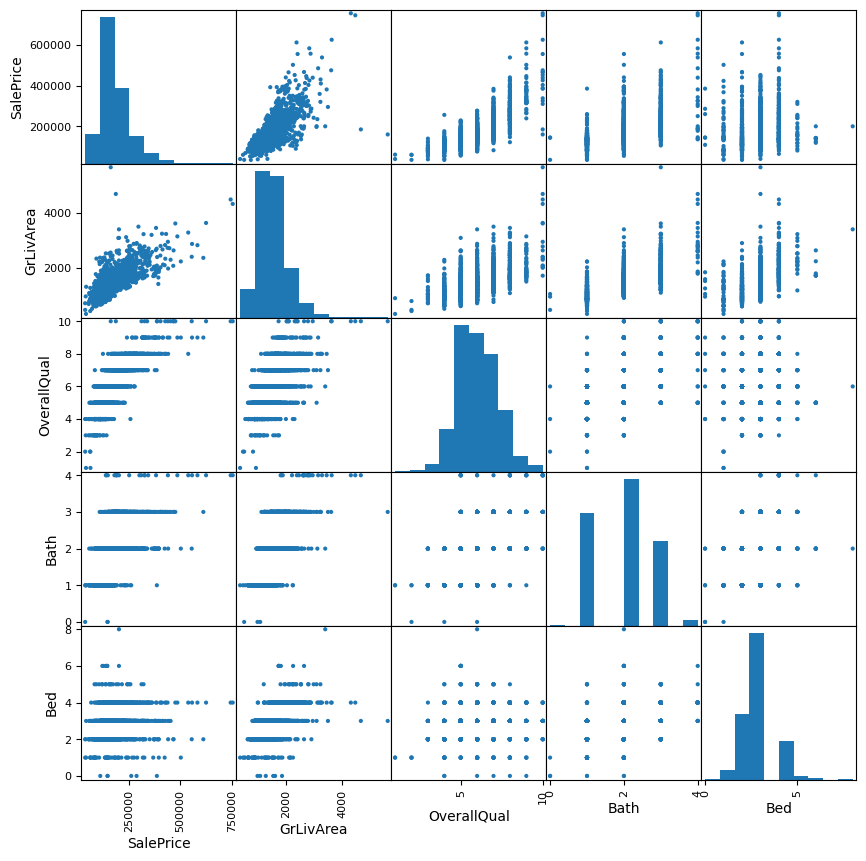

In [9]:
attributes = ["SalePrice","GrLivArea", "OverallQual", "Bath", "Bed"]
scatter_matrix(df[attributes], alpha=1, figsize=(10,10))

In [10]:
for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For SalePrice,663 unique values present
For LotArea,1073 unique values present
For OverallQual,10 unique values present
For OverallCond,9 unique values present
For YearBuilt,112 unique values present
For 1stFlrSF,753 unique values present
For 2ndFlrSF,417 unique values present
For GrLivArea,861 unique values present
For FullBath,4 unique values present
For HalfBath,3 unique values present
For Bed,8 unique values present
For Bath,5 unique values present
For GarageArea,441 unique values present


## Splitting the Dataframe into train and test

In [11]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


## Importing the Dataframe for predictions are to be done

In [12]:
tf= pd.read_csv("testtry.csv")
tf.isnull().sum()*100/tf.shape[0]

LotArea        0.0
OverallQual    0.0
OverallCond    0.0
YearBuilt      0.0
1stFlrSF       0.0
2ndFlrSF       0.0
GrLivArea      0.0
FullBath       0.0
HalfBath       0.0
Bed            0.0
Bath           0.0
GarageArea     0.0
dtype: float64

In [13]:
z_test = tf.iloc[:,0:].values

## Building models with 1) Multiple Linear Regression, 2) Decision Tree and 3) Random Forest

In [14]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [15]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [16]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

## Scores to check the accuracy of each Model

In [17]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)


Multiple Linear Regression Model Score is  70
Decision tree  Regression Model Score is  69
Random Forest Regression Model Score is  83


,Model,Score,Explained Variance Score
2,Random forest Regression,0.828378,0.819040
0,Multiple Linear Regression,0.699813,0.661633
1,Decision Tree,0.692613,0.729143


## Predictions by all the three model

In [18]:
rf_pred_test =rf_regressor.predict(z_test)
pf_rf = pd.DataFrame(rf_pred_test, columns=['Pred_Price'])
pf_rf.to_csv('predictions.csv')
print("Predictions from Random Forest being the most accurate are saved as excel file 'predictions.csv'")

Predictions from Random Forest being the most accurate are saved as excel file 'predictions.csv'


In [19]:
pred_mlr_test = mlr.predict(z_test)
pf_mlr = pd.DataFrame(pred_mlr_test, columns=['Pred_Price'])
print("Predictions from Decision Tree is in 'pf_mlr'")

Predictions from Decision Tree is in 'pf_mlr'


In [20]:
pred_tr_test = tr_regressor.predict(z_test)
pf_tr = pd.DataFrame(pred_tr_test, columns=['Pred_Price'])
print("Predictions from Decision Tree is in 'pf_tr'")

Predictions from Decision Tree is in 'pf_tr'
